### Importing Libraries

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
%matplotlib inline
import datetime

### Reading Data

In [7]:
train=pd.read_csv(r"C:\\Users\\hp\dataset\nyc_taxi_trip_duration.csv")

In [8]:
full_data=[train]

In [9]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [10]:
del train['id']

In [29]:
for data in full_data:
    print(data.isnull().sum())

vendor_id             0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
year                  0
month                 0
day                   0
hour                  0
distance              0
log_trip_duration     0
dtype: int64


In [15]:
!pip install geopy

There are no null values

In [13]:
for data in full_data:
    data['year']=data['pickup_datetime'].apply(lambda x:x.split('-')[0])
    data['month']=data['pickup_datetime'].apply(lambda x:x.split('-')[1])
    data['day']=data['pickup_datetime'].apply(lambda x:x.split('-')[2].split()[0])
    data['hour']=data['pickup_datetime'].apply(lambda x:x.split('-')[2].split()[1].split(':')[0])
for data in full_data:
    del data['pickup_datetime']
del train['dropoff_datetime']    

### Getting distance from latitude and longitude

In [16]:
import geopy
from geopy.distance import great_circle
for data in full_data:
    data['distance']=data.apply(lambda row: great_circle((row[3],row[2]),(row[5],row[4])).kilometers,axis=1)

In [17]:
train.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,year,month,day,hour,distance
0,2,1,-73.953918,40.778873,-73.963875,40.771164,N,400,2016,02,29,16,1.199074
1,1,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,2016,03,11,23,4.129117
2,2,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,2016,02,21,17,7.250763
3,2,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,2016,01,05,09,2.361101
4,1,1,-74.017120,40.708469,-73.988182,40.740631,N,848,2016,02,17,06,4.328540


In [19]:
train['log_trip_duration']=np.log(train.trip_duration.values+1)

In [21]:
train.head(2)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,year,month,day,hour,distance,log_trip_duration
0,2,1,-73.953918,40.778873,-73.963875,40.771164,N,400,2016,02,29,16,1.199074,5.993961
1,1,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,2016,03,11,23,4.129117,7.003974


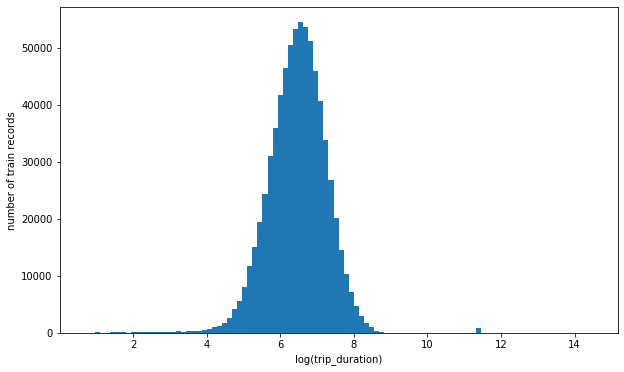

In [22]:
plt.figure(figsize=(10,6))
plt.hist(train.log_trip_duration,bins=100)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of train records')
plt.show()

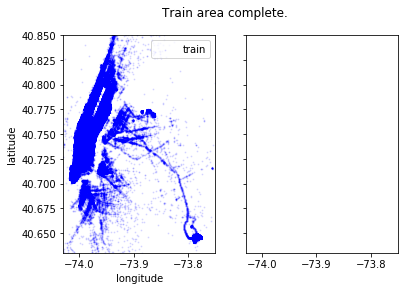

In [27]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
ax[0].scatter(train['pickup_longitude'].values, train['pickup_latitude'].values,
              color='blue', s=1, label='train', alpha=0.1)
fig.suptitle('Train area complete.')
ax[0].legend(loc=0)
ax[0].set_ylabel('latitude')
ax[0].set_xlabel('longitude')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

### Applying PCA on latitude and longitude

In [30]:
from sklearn.decomposition import PCA

In [32]:
coords = np.vstack((train[['pickup_latitude', 'pickup_longitude']].values,
                    train[['dropoff_latitude', 'dropoff_longitude']].values))

In [33]:
pca=PCA()
pca.fit(coords)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [34]:
train['pickup_lat_pca']=pca.transform(train[['pickup_latitude','pickup_longitude']])[:,0]
train['pickup_long_pca']=pca.transform(train[['pickup_latitude','pickup_longitude']])[:,1]
train['dropoff_lat_pca']=pca.transform(train[['pickup_latitude','pickup_longitude']])[:,0]
train['dropoff_long_pca']=pca.transform(train[['pickup_latitude','pickup_longitude']])[:,1]

In [35]:
train.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,year,month,day,hour,distance,log_trip_duration,pickup_lat_pca,pickup_long_pca,dropoff_lat_pca,dropoff_long_pca
0,2,1,-73.953918,40.778873,-73.963875,40.771164,N,400,2016,02,29,16,1.199074,5.993961,-0.021334,0.026167,-0.021334,0.026167
1,1,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,2016,03,11,23,4.129117,7.003974,0.016114,-0.018575,0.016114,-0.018575
2,2,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,2016,02,21,17,7.250763,7.400010,0.025779,-0.028239,0.025779,-0.028239
3,2,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,2016,01,05,09,2.361101,7.040536,-0.012328,0.007571,-0.012328,0.007571
4,1,1,-74.017120,40.708469,-73.988182,40.740631,N,848,2016,02,17,06,4.328540,6.744059,0.046404,-0.039884,0.046404,-0.039884


In [36]:
for data in full_data:
    for i in ['year','month','day','hour']:
        data[i]=data[i].astype(int)

In [37]:
for data in full_data:
    data['store_and_fwd_flag']=data['store_and_fwd_flag'].map({'N':0,'Y':1})

In [38]:
for data in full_data:
    data.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1,inplace=True)

In [39]:
train['speed']=(3600*train.distance/train.trip_duration)

In [40]:
train.head(2)

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,year,month,day,hour,distance,log_trip_duration,pickup_lat_pca,pickup_long_pca,dropoff_lat_pca,dropoff_long_pca,speed
0,2,1,0,400,2016,2,29,16,1.199074,5.993961,-0.021334,0.026167,-0.021334,0.026167,10.791669
1,1,2,0,1100,2016,3,11,23,4.129117,7.003974,0.016114,-0.018575,0.016114,-0.018575,13.513473


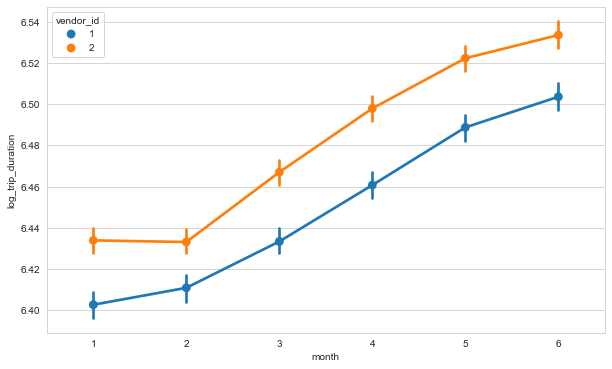

In [41]:
plt.figure(figsize=(10,6))
sns.set_style(style='whitegrid')
sns.pointplot(data=train,x='month',y='log_trip_duration',hue='vendor_id')
plt.show()

In [42]:
for data in full_data:
    data.loc[(data.month>=1)&(data.month<=2),'month_bin']=1
    data.loc[(data.month>=3)&(data.month<=5),'month_bin']=2
    data.loc[data.month==6,'month_bin']=3

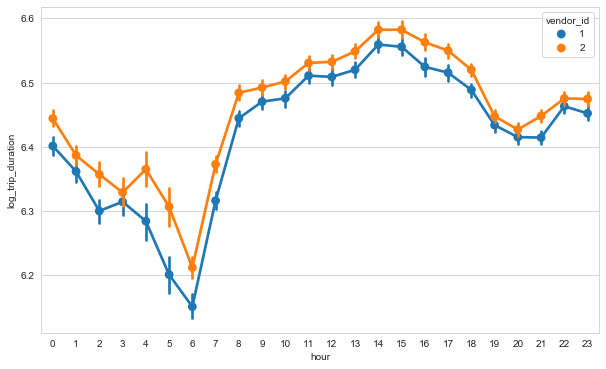

In [44]:
plt.figure(figsize=(10,6))
sns.set_style(style='whitegrid')
sns.pointplot(data=train,x='hour',y='log_trip_duration',hue='vendor_id')
plt.show()

In [45]:
for data in full_data:
    data.loc[(data.hour>=0)&(data.hour<=4),'hour_bin']=1
    data.loc[(data.hour>=5)&(data.hour<=8),'hour_bin']=2
    data.loc[(data.hour>=9)&(data.hour<=18),'hour_bin']=3
    data.loc[(data.hour>=19)&(data.hour<=23),'hour_bin']=4

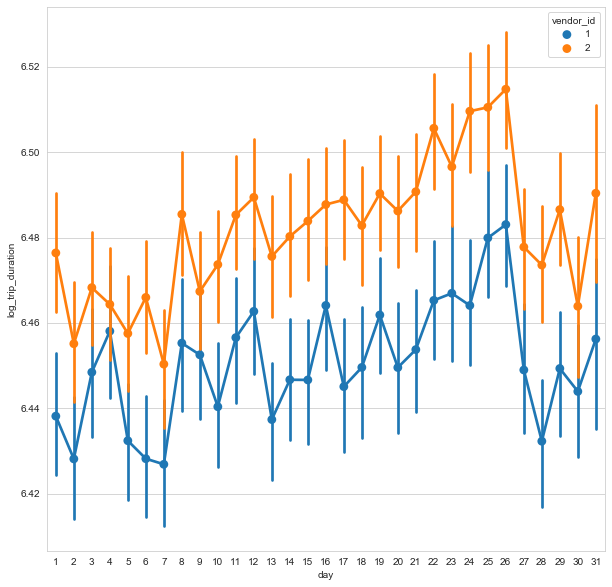

In [46]:
plt.figure(figsize=(10,10))
sns.set_style(style='whitegrid')
sns.pointplot(data=train,x='day',y='log_trip_duration',hue='vendor_id')
plt.show()

In [47]:
for data in full_data:
    data['day_bin']=0
    data.loc[(data.day>=22)&(data.day<=31),'day_bin']=1

In [48]:
train.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,year,month,day,hour,distance,log_trip_duration,pickup_lat_pca,pickup_long_pca,dropoff_lat_pca,dropoff_long_pca,speed,month_bin,hour_bin,day_bin
0,2,1,0,400,2016,2,29,16,1.199074,5.993961,-0.021334,0.026167,-0.021334,0.026167,10.791669,1.0,3.0,1
1,1,2,0,1100,2016,3,11,23,4.129117,7.003974,0.016114,-0.018575,0.016114,-0.018575,13.513473,2.0,4.0,0
2,2,2,0,1635,2016,2,21,17,7.250763,7.400010,0.025779,-0.028239,0.025779,-0.028239,15.964983,1.0,3.0,0
3,2,6,0,1141,2016,1,5,9,2.361101,7.040536,-0.012328,0.007571,-0.012328,0.007571,7.449573,1.0,3.0,0
4,1,1,0,848,2016,2,17,6,4.328540,6.744059,0.046404,-0.039884,0.046404,-0.039884,18.375877,1.0,2.0,0


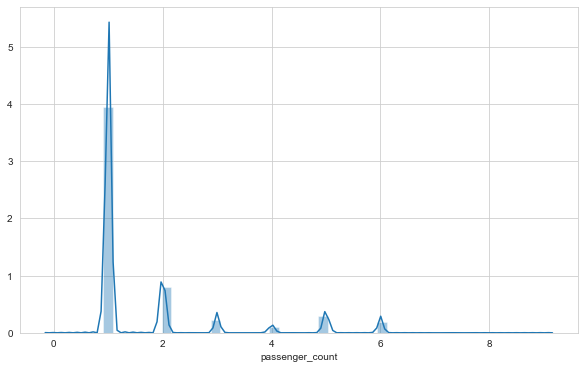

In [49]:
plt.figure(figsize=(10,6))
sns.distplot(train.passenger_count)

In [50]:
pd.value_counts(train.passenger_count>6)

False    729320
True          2
Name: passenger_count, dtype: int64

In [51]:
train[train.passenger_count>6]

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,year,month,day,hour,distance,log_trip_duration,pickup_lat_pca,pickup_long_pca,dropoff_lat_pca,dropoff_long_pca,speed,month_bin,hour_bin,day_bin
149473,2,7,0,19,2016,6,7,10,0.002625,2.995732,0.200693,-0.000744,0.200693,-0.000744,0.497364,3.0,3.0,0
629474,2,9,0,560,2016,6,24,8,0.000000,6.329721,-0.256957,-0.097048,-0.256957,-0.097048,0.000000,3.0,2.0,1


In [52]:
train=train.drop(train[train.passenger_count>6].index)

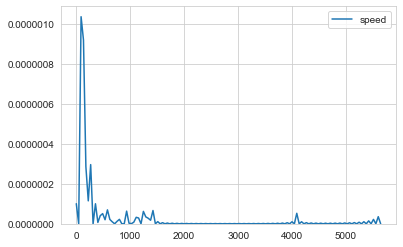

In [53]:
sns.kdeplot(data=train.speed)

In [36]:
train=train.drop(train[(train.speed>80)&(train.trip_duration<30)].index)

In [37]:
train=train.drop(train[train.speed>100].index)

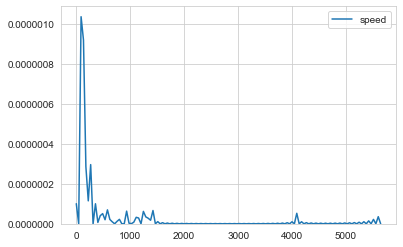

In [54]:
sns.kdeplot(train.speed)

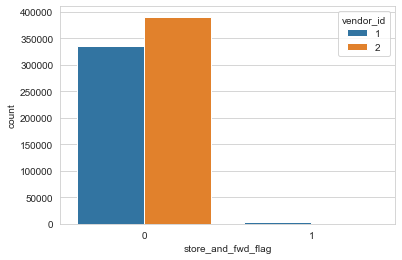

In [55]:
sns.countplot(train.store_and_fwd_flag,hue=train.vendor_id)

In [56]:
train.head(2)

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,year,month,day,hour,distance,log_trip_duration,pickup_lat_pca,pickup_long_pca,dropoff_lat_pca,dropoff_long_pca,speed,month_bin,hour_bin,day_bin
0,2,1,0,400,2016,2,29,16,1.199074,5.993961,-0.021334,0.026167,-0.021334,0.026167,10.791669,1.0,3.0,1
1,1,2,0,1100,2016,3,11,23,4.129117,7.003974,0.016114,-0.018575,0.016114,-0.018575,13.513473,2.0,4.0,0


### Modelling

In [57]:
features=[i for i in train.columns if i not in ['trip_duration','speed','log_trip_duration','year']]

In [58]:
features

['vendor_id',
 'passenger_count',
 'store_and_fwd_flag',
 'month',
 'day',
 'hour',
 'distance',
 'pickup_lat_pca',
 'pickup_long_pca',
 'dropoff_lat_pca',
 'dropoff_long_pca',
 'month_bin',
 'hour_bin',
 'day_bin']

In [59]:
target=['log_trip_duration']

In [60]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(categorical_features=[0,2,3,4,5,11,12,13])

In [61]:
xtrain=ohe.fit_transform(train[features].values).toarray()

F:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
F:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [62]:
xtrain.shape

(729320, 80)

In [63]:
xtest=train[target]

In [64]:
xtest=np.ravel(xtest)

In [65]:
xtest.shape

(729320,)

In [66]:
from sklearn.ensemble import RandomForestRegressor
tree=RandomForestRegressor(n_estimators=10)
import time

In [70]:
t1=time.time()
print (tree.fit(xtrain,xtest))
t2=time.time()
print (t2-t1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
163.12547087669373


In [80]:
ohe_t=OneHotEncoder(categorical_features=[0,2,3,4,5,11,12,13])

In [82]:
submission=pd.read_csv(r"C:\\Users\\hp\dataset\nyc_taxi_trip_duration.csv")
submission=submission['id']
submission=pd.DataFrame(submission)
submission.to_csv('submission_3_d.csv',index=False)